# Research the correlation between PFT and lung volume

import numpy as np
from glob import glob
from skimage.morphology import skeletonize_3d
from medutils.medutils import load_itk, save_itk
import SimpleITK as sitk
import itk
from tqdm import tqdm
import matplotlib.pyplot as plt
from skimage.morphology import disk,diamond,rectangle,square,erosion,dilation,opening,closing,skeletonize
import pickle
import pandas as pd
import json


In [1]:
import numpy as np
from glob import glob
from skimage.morphology import skeletonize_3d
from medutils.medutils import load_itk, save_itk
import SimpleITK as sitk
import itk
from tqdm import tqdm
import matplotlib.pyplot as plt
from skimage.morphology import disk,diamond,rectangle,square,erosion,dilation,opening,closing,skeletonize
import pickle
import pandas as pd
import json


The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.


In [22]:
pft_fpath = '/home/jjia/data/dataset/lung_function/SScBaseline_PFT_anonymized_with_percent.xlsx'  # id from 0068800 to 99..., total 333 cases
label_excel = pd.read_excel(pft_fpath, engine='openpyxl')
label_excel = label_excel.sort_values(by=['subjectID'])


In [23]:
label_excel

,subjectID,scandate,TLC_Lres,DateDF_abs,ScanDate,PFT Date,Date of Birth,Gender,Age,Height,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,FVC_PP,DLCOc_PP,FEV1_PP,TLC_PP
122,SSc_patient_0068800,20110701,YES,1.0,2011-07-01,2011-06-30,1951-12-07,female,60.0,1.81,...,NaN,NaN,NaN,NaN,NaN,NaN,108,83,111,95
123,SSc_patient_0127512,20091127,YES,1.0,2009-11-27,2009-11-26,1931-03-07,female,78.0,1.56,...,NaN,NaN,NaN,NaN,NaN,NaN,88,68,87,87
124,SSc_patient_0139552,20121102,YES,1.0,2012-11-02,2012-11-01,1939-06-17,female,73.0,1.71,...,NaN,NaN,NaN,NaN,NaN,NaN,115,73,112,105
125,SSc_patient_0143788,20090529,YES,0.0,2009-05-28,2009-05-28,1942-09-12,female,68.0,1.70,...,NaN,NaN,NaN,NaN,NaN,NaN,87,17,89,71
126,SSc_patient_0152440,20100604,YES,1.0,2010-06-04,2010-06-03,1946-12-23,female,64.0,1.60,...,NaN,NaN,NaN,NaN,NaN,NaN,101,110,104,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,SSc_patient_9523013,20090904,YES,1.0,2009-09-04,2009-09-03,1978-10-01,male,31.0,1.80,...,NaN,NaN,NaN,NaN,NaN,NaN,80,60,82,66
121,SSc_patient_9662556,20120921,NO,1.0,2012-09-21,2012-09-20,1984-02-19,female,28.0,1.71,...,NaN,NaN,NaN,NaN,NaN,NaN,102,78,102,90
330,SSc_patient_9861781,20090417,YES,1.0,2009-04-17,2009-04-16,1958-03-03 00:00:00,male,51.0,1.77,...,NaN,NaN,NaN,NaN,NaN,NaN,100,56,100,86
331,SSc_patient_9934096,20100122,YES,1.0,2010-01-22,2010-01-21,1941-02-02,female,69.0,1.57,...,NaN,NaN,NaN,NaN,NaN,NaN,102,79,99,101


## Calculate vessel volume and save them to a file

In [6]:
data_dir = '/home/jjia/data/dataset/lung_function/iso1.5'

vessel_files = glob(data_dir + '/*GcVessel.nii.gz')

In [7]:
len(vessel_files)

317

In [8]:
volume_ls = []
for i in vessel_files:
    lung, ori, sp = load_itk(i, require_ori_sp=True)
    lung_volume = np.sum(lung)
    volume_ls.append([i.split('SSc_patient_')[-1][:7], lung_volume])


In [9]:
volume_dt = {i[0]: i[1] for i in volume_ls}

In [10]:
volume_dt

{'6224742': 349734,
 '6366968': 137611,
 '6122288': 92559,
 '5202686': 105218,
 '9241693': 71808,
 '5150048': 164370,
 '9662556': 61006,
 '7421048': 59184,
 '5112278': 75292,
 '5301625': 148725,
 '8256587': 157994,
 '1244023': 167195,
 '1239567': 129267,
 '7886110': 116282,
 '8229975': 85605,
 '3154090': 64002,
 '3567342': 62723,
 '2151769': 96996,
 '2346390': 61585,
 '0534778': 138425,
 '2252561': 152687,
 '7247972': 139353,
 '2087864': 109805,
 '9163194': 108670,
 '1759534': 169437,
 '7114639': 196187,
 '0485784': 145473,
 '0315457': 137958,
 '9272348': 111470,
 '5271048': 71029,
 '0265042': 130276,
 '5652668': 162180,
 '1499510': 83441,
 '2340524': 168425,
 '0213786': 128721,
 '0787506': 193345,
 '3901150': 60964,
 '5289050': 131743,
 '3221222': 132191,
 '9270279': 114973,
 '7120342': 161052,
 '8784276': 130019,
 '1333231': 164331,
 '9224744': 202049,
 '0703966': 148759,
 '3191882': 116164,
 '0553478': 128113,
 '0277377': 104962,
 '5095311': 188357,
 '5174713': 69026,
 '9367440': 86

In [11]:
df = pd.DataFrame(np.array(volume_ls), columns=['pat_id', 'vessel_volume'])

In [12]:
df

,pat_id,vessel_volume
0,6224742,349734
1,6366968,137611
2,6122288,92559
3,5202686,105218
4,9241693,71808
...,...,...
312,8492153,122981
313,0280727,79734
314,3729608,134285
315,0219312,157487


In [13]:
df_new = pd.DataFrame(columns=['pat_id', 'vessel_volume', 'DLCO', 'FEV1', 'FVC', 'TLC'])

In [14]:
pat_id_ls = [i[0] for i in volume_ls]
len(pat_id_ls)

317

In [24]:
for i in label_excel:
    print(i)

subjectID
scandate
TLC_Lres
DateDF_abs
ScanDate
PFT Date
Date of Birth
Gender
Age
Height
Weight
DLCO_SB
DLCO_SB / VA
DLCOc_SB
DLCOc/pred
DLCOc_SB / VA
FEV1
FEV1/pred
FEV 1 % FVC
FEV 1 % VC
FVC
FVC/pred
FVC/predNew
VC in
TLC_He
TLC/pred
Remarks
Remarks_Jingnan: yellow means NV, red means "obtained by guess by JIngnan"
Unnamed: 28
Unnamed: 29
Unnamed: 30
Unnamed: 31
Unnamed: 32
Unnamed: 33
Unnamed: 34
Unnamed: 35
FVC_PP
DLCOc_PP
FEV1_PP
TLC_PP


In [16]:
i = 0
for idx, row in label_excel.iterrows():
    id = row['subjectID'].split('SSc_patient_')[-1][:7]
    if id in pat_id_ls:
        
        df_new.loc[i] = [id, volume_dt[id]/1e4, row['DLCO_SB'], row['FEV1'], row['FVC'], row['TLC_He']]
        i += 1
    # print(idx, row['subjectID'])

In [17]:
df_new

,pat_id,vessel_volume,DLCO,FEV1,FVC,TLC
0,0068800,13.2840,7.331,3.491,4.363,6.261
1,0127512,10.3244,3.944,1.575,2.076,3.864
2,0139552,7.3081,5.295,2.626,3.544,5.781
3,0143788,19.0414,1.240,2.260,2.860,3.970
4,0152440,5.7397,7.103,2.402,2.994,4.525
...,...,...,...,...,...,...
312,9523013,15.0919,6.753,3.492,4.117,5.214
313,9662556,6.1006,6.641,3.666,4.340,5.188
314,9861781,16.0638,5.380,3.870,4.900,6.120
315,9934096,7.1400,4.621,2.057,2.706,4.673


In [18]:
df_new['vessel_volume'] = df_new['vessel_volume'].astype(float)

In [19]:
df_new.corr()

,vessel_volume,DLCO,FEV1,FVC,TLC
vessel_volume,1.000000,-0.122873,0.035452,0.084429,0.135079
DLCO,-0.122873,1.000000,0.799805,0.779263,0.709412
FEV1,0.035452,0.799805,1.000000,0.940039,0.808512
FVC,0.084429,0.779263,0.940039,1.000000,0.907825
TLC,0.135079,0.709412,0.808512,0.907825,1.000000


<AxesSubplot: >

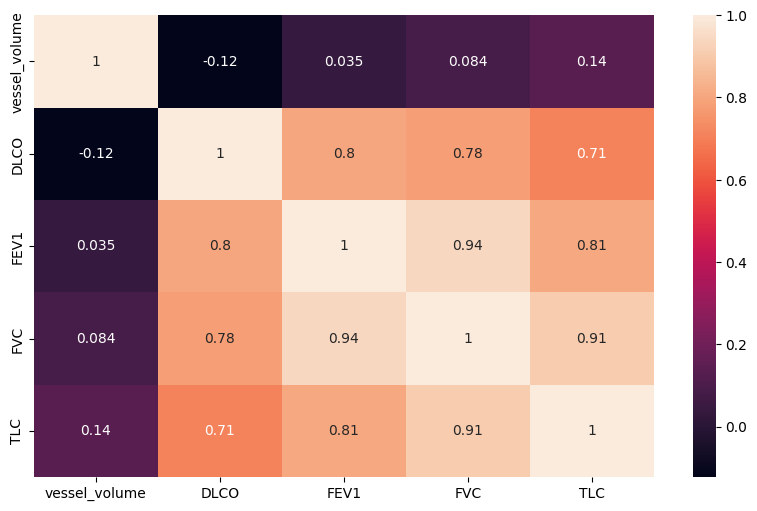

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(df_new.corr(), ax=ax, annot=True)